# Data Pre-Processing

In [1]:
### Importing relevant libraries ###

import pandas as pd
import numpy as np
from statistics import mode
import scipy
from scipy.stats import skew

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

In [2]:
### Importing Heart Disease dataset ###

# Fill in  '?' value with NaN, as this is a value not provided
missing_values = ["?"]

# Importing dataset and converting '?' values to NAN
dataset = pd.read_csv('original_heart_disease_dataset.csv', na_values = missing_values)
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
0,63,1,1,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67,1,4,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67,1,4,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37,1,3,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41,0,2,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### a) Exploratory data analysis (EDA)

In [3]:
### Printing information regarding the heart disease dataset ###

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    int64  
 2   cp        920 non-null    int64  
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    float64
 6   restecg   918 non-null    float64
 7   thalach   865 non-null    float64
 8   exang     865 non-null    float64
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    float64
 11  ca        309 non-null    float64
 12  thal      434 non-null    float64
 13  goal      920 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 100.8 KB


In [4]:
### Returning dimensionality of the Dataset ###

dataset.shape

(920, 14)

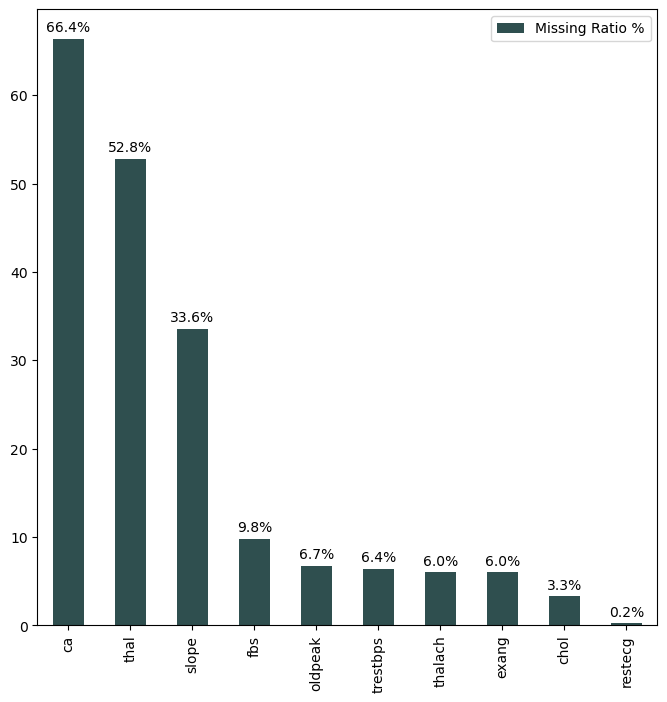

In [5]:
### Function to plot the percentage of missing values ###

# This will plot only the columns that have missing values.

def plot_null(df: pd.DataFrame):

    # Box plot have been selected for this purpose.
    if df.isnull().sum().sum() != 0:
        null_df = (df.isnull().sum() / len(df)) * 100
        null_df = null_df.drop(null_df[null_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :null_df})
        plots =  missing_data.plot(kind = "bar", color = 'darkslategrey', figsize=(8,8))

        #Annotate text in bar plot
        for bar in plots.patches:
            plots.annotate('{:,.1f}'.format(bar.get_height())+ "%",
                           (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                           ha='center', va='center',
                           size=10, xytext=(0, 8),
                           textcoords='offset points')

        plt.show()

    else:
        print('No NAs found')

plot_null(dataset)

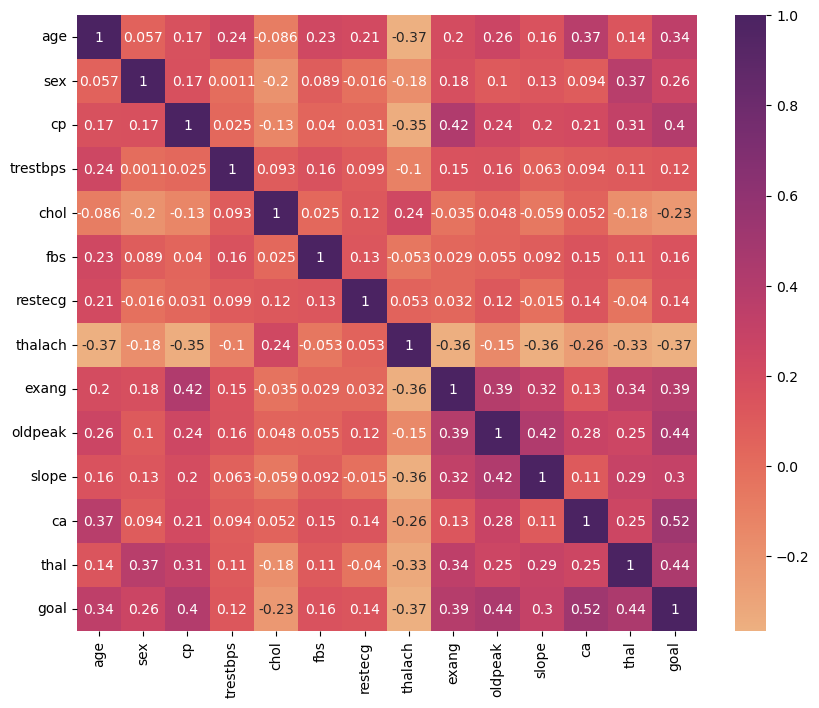

In [6]:
### Correlation Heat map of our original dataset ###

# a two dimensional plot of the amount of correlation (measure of dependence) between variables.

def plot_corrheatmap(df: pd.DataFrame):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), cmap='flare', annot=True)


plot_corrheatmap(dataset)

Text(0.5, 1.0, 'Count of target\n')

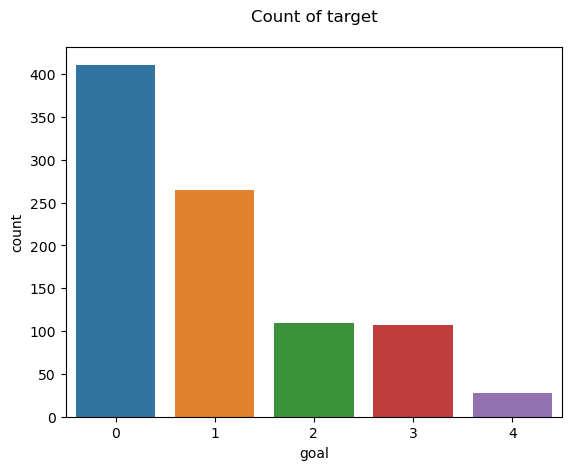

In [7]:
### Counting values in the target variable ###

# drawing count plot
sns.countplot(data= dataset, x='goal')
plt.title('Count of target\n')

### b) Cleaning Columns

In [8]:
# There are no null values found in age, sex, cp, and goal(target) columns.

In [9]:
# Rest of the columns should be cleaned

In [10]:
### Displaying basic statistical details (description about the dataset) ###

dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
count,920.000000,920.000000,920.000000,861.000000,890.000000,830.000000,918.000000,865.000000,865.000000,858.000000,611.000000,309.000000,434.000000,920.000000
mean,53.510870,0.789130,3.250000,132.132404,199.130337,0.166265,0.604575,137.545665,0.389595,0.878788,1.770867,0.676375,5.087558,0.995652
std,9.424685,0.408148,0.930969,19.066070,110.780810,0.372543,0.805827,25.926276,0.487941,1.091226,0.619256,0.935653,1.919075,1.142693
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,175.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,140.000000,0.000000,0.500000,2.000000,0.000000,6.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,268.000000,0.000000,1.000000,157.000000,1.000000,1.500000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


#### Age Column

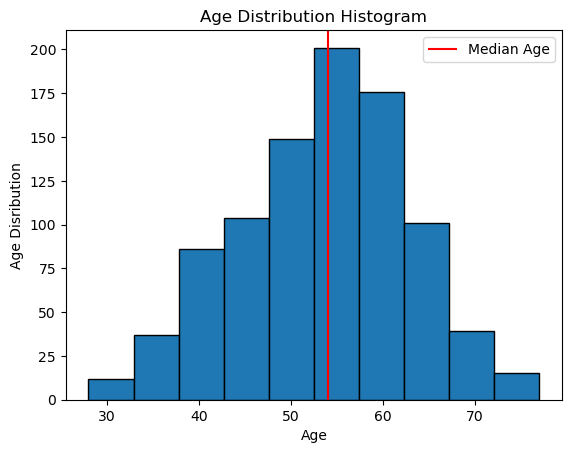

In [11]:
### Displaying a histogram (distribution) for age column ###

def plot_age(df: pd.DataFrame):
    # Creating a list of age sorted in ascending order.
    age = df["age"].tolist()

    # Creating a dataframe of sorted age
    sorted_age = df[["age"]].sort_values(by=['age'])

    ### Plotting a histogram to represent the distribution of age column:

    # Calculating median for the age column
    median_age = sorted_age["age"].median()

    plt.hist(age, bins=10, edgecolor='black')
    plt.axvline(median_age, color='red', label="Median Age")
    plt.xlabel("Age")
    plt.ylabel("Age Disribution")
    plt.title("Age Distribution Histogram")
    plt.legend()
    plt.show()


plot_age(dataset)

In [12]:
# Calculate the skewness 
print(skew(dataset['age']))

-0.19567416156265732


#### Sex Column

In [13]:
### Checking values in "sex" column ###

# Sex column have two values - 0 and 1 (binary column).
print(dataset["sex"].value_counts())

1    726
0    194
Name: sex, dtype: int64


#### CP Column

In [14]:
### Checking values in "cp" column ###

# "cp" column have four values - 1, 2, 3 and 4 (categorical column).

print(dataset["cp"].value_counts())

4    496
3    204
2    174
1     46
Name: cp, dtype: int64


#### Trestbps Column

In [15]:
### Checking values in "trestbps" column ###

# Problem - the value of trestbps cannot be 0, as resting bp cannot be 0.

print(dataset["trestbps"].value_counts().index.tolist())

[120.0, 130.0, 140.0, 110.0, 150.0, 160.0, 125.0, 115.0, 135.0, 128.0, 145.0, 100.0, 138.0, 112.0, 170.0, 124.0, 180.0, 122.0, 132.0, 118.0, 134.0, 142.0, 105.0, 136.0, 155.0, 108.0, 152.0, 126.0, 144.0, 95.0, 200.0, 158.0, 178.0, 146.0, 106.0, 104.0, 154.0, 102.0, 156.0, 114.0, 190.0, 116.0, 165.0, 148.0, 172.0, 94.0, 123.0, 92.0, 96.0, 0.0, 185.0, 80.0, 117.0, 113.0, 129.0, 98.0, 164.0, 101.0, 174.0, 192.0, 127.0]


In [16]:
### Checking how many values are "0" ###

missing = 0
for value in (dataset["trestbps"].tolist()):
    if value == 0.0:
        missing += 1

print(missing)

1


In [17]:
# Only one value is 0

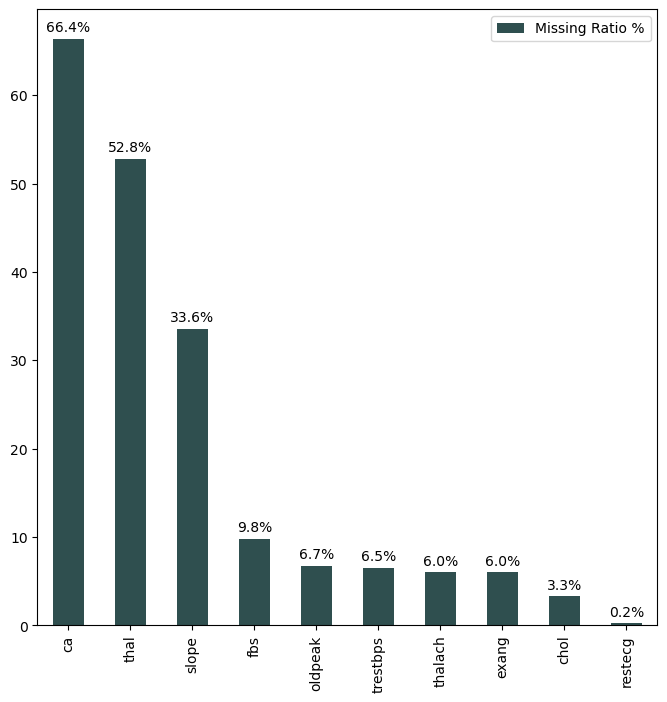

In [18]:
### Checking percentage of missing values if 0 gets replaced with NAN ###

null_check_df = dataset.copy(deep=True)
null_check_df.trestbps.replace(to_replace = 0.0, value=np.nan, inplace = True)
plot_null(null_check_df)

In [19]:
### Replacing 0 with NAN (missing value) in the original dataset ###

# As resting blood pressure cannot be 0,
# it means it is a missing value / value not provided / missing due to error.
# Hence substitute it with the NAN value

dataset.trestbps.replace(to_replace = 0.0, value=np.nan, inplace = True)
print(dataset["trestbps"].isnull().sum())

60


##### Checking data distribution

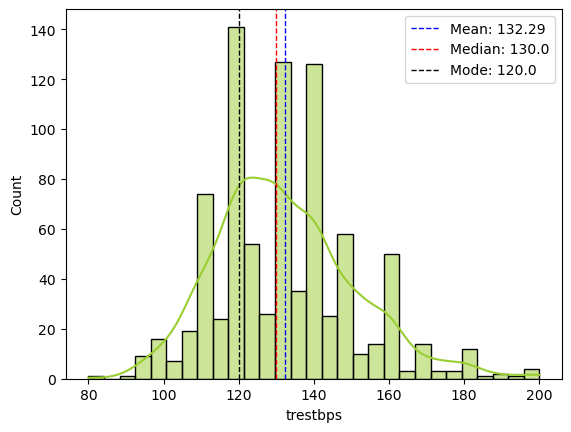

In [20]:
### Checking how data is distributed ###
# to decide the best method for imputation (mean or median)

# Plotting histogram plot
sns.histplot(dataset['trestbps'], kde=True, color='yellowgreen')
# Removing color of the edges of histogram bars
plt.rcParams['patch.edgecolor'] = 'none'


# Plotting mean, median and mode
plt.axvline(dataset['trestbps'].mean(), color='blue', linestyle='dashed', linewidth=1, label="Mean: " + str(round(dataset['trestbps'].mean(), 2)))
plt.axvline(dataset['trestbps'].median(), color='red', linestyle='dashed', linewidth=1, label="Median: " + str(round(dataset['trestbps'].median(), 2)))
plt.axvline(dataset['trestbps'].mode()[0], color='black', linestyle='dashed', linewidth=1, label="Mode: " + str(round(dataset['trestbps'].mode()[0], 2)))
# Displaying legend
plt.legend(loc='upper right')

In [21]:
# Calculate the skewness 
print(skew(dataset['trestbps'], nan_policy='omit'))

0.6290592677780329


The data in this column is a positively skewed distribution. Hence Median Imputation method will be suitable

##### Median Imputation

In [22]:
### Replacing missing values with median ###

# Trestbps column contains 6.4% missing values, as shown in the visual above.
# After converting 0 -> null values, missing values increased to 6.5%.
# Filling missing values with the median value, as the column is continuous

dataset['trestbps'].fillna(value = round(dataset['trestbps'].median(), 1), inplace=True)
dataset["trestbps"].astype(int)

0      145
1      160
2      120
3      130
4      130
      ... 
915    127
916    130
917    122
918    130
919    120
Name: trestbps, Length: 920, dtype: int32

In [23]:
### Checking if any missing value is left ###

se = dataset["trestbps"].tolist()
for i in se:
    if i == 0 or i == np.nan:
        p='true'
    else:
        p='false'
print(p)

false


In [24]:
# All missing value are imputed in Trestbps column

#### Chol Column

In [25]:
### Checking values in "chol" column ###

# Problem - the value of chol cannot be 0, as serum cholesterol cannot be 0

print(dataset["chol"].value_counts().index.tolist())

[0.0, 220.0, 254.0, 223.0, 230.0, 204.0, 219.0, 211.0, 216.0, 260.0, 246.0, 240.0, 213.0, 203.0, 234.0, 258.0, 197.0, 282.0, 263.0, 275.0, 214.0, 243.0, 201.0, 245.0, 222.0, 308.0, 274.0, 270.0, 212.0, 248.0, 186.0, 264.0, 225.0, 198.0, 233.0, 288.0, 224.0, 193.0, 236.0, 237.0, 218.0, 196.0, 195.0, 207.0, 226.0, 289.0, 269.0, 298.0, 277.0, 209.0, 160.0, 182.0, 249.0, 215.0, 228.0, 221.0, 267.0, 208.0, 231.0, 250.0, 268.0, 177.0, 273.0, 256.0, 283.0, 266.0, 297.0, 217.0, 276.0, 227.0, 284.0, 244.0, 239.0, 184.0, 265.0, 294.0, 200.0, 295.0, 229.0, 271.0, 309.0, 210.0, 303.0, 305.0, 292.0, 175.0, 253.0, 188.0, 238.0, 202.0, 306.0, 192.0, 291.0, 206.0, 315.0, 166.0, 199.0, 310.0, 235.0, 257.0, 180.0, 232.0, 241.0, 342.0, 318.0, 281.0, 341.0, 272.0, 171.0, 247.0, 255.0, 252.0, 261.0, 205.0, 161.0, 170.0, 100.0, 320.0, 280.0, 312.0, 187.0, 194.0, 173.0, 285.0, 163.0, 149.0, 311.0, 179.0, 339.0, 147.0, 287.0, 242.0, 300.0, 302.0, 299.0, 330.0, 290.0, 172.0, 304.0, 326.0, 167.0, 325.0, 164.0, 

In [26]:
### Checking how many values are "0" ###

missing = 0
for value in (dataset["chol"].tolist()):
    if value == 0.0:
        missing += 1

print(missing)

172


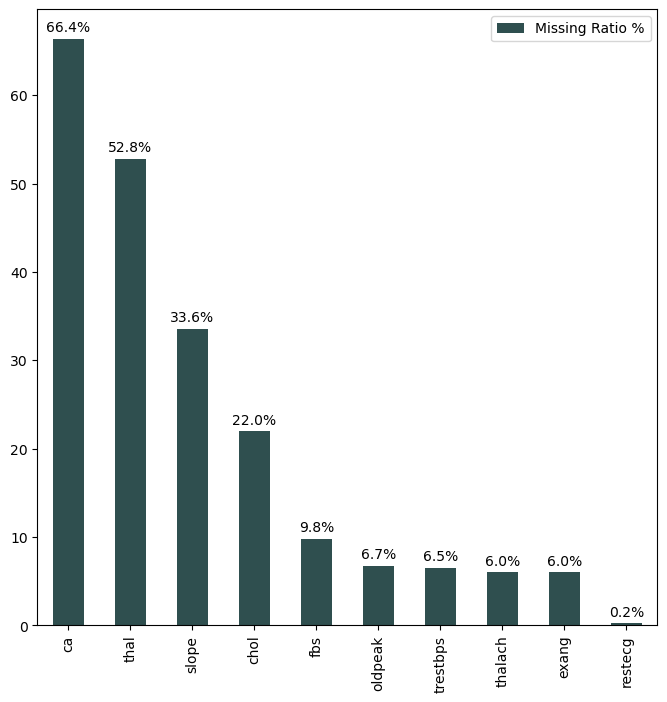

In [27]:
### Checking percentage of missing values if 0 gets replaced with NAN ###

null_check_df.chol.replace(to_replace = 0.0, value=np.nan, inplace = True)
plot_null(null_check_df)

In [28]:
### Replacing 0 with NAN (missing value) in the original dataset ###

# As serum cholesterol cannot be 0,
# it means it is a missing value / value not provided / missing due to error.
# Hence substitute it with the NAN value

null_check_df = dataset.chol.replace(to_replace=0.0, value=np.nan, inplace=True)
print(dataset["chol"].isnull().sum())

202


##### Checking data distribution

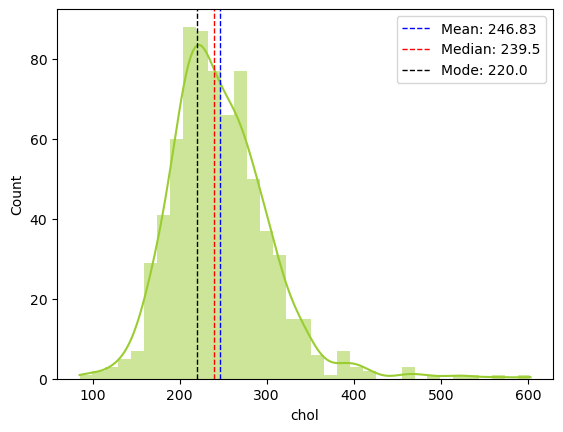

In [29]:
### Checking how data is distributed ###
# to decide the best method for imputation (mean or median)

# Plotting histogram plot
sns.histplot(dataset['chol'], kde=True, color='yellowgreen')
# Removing color of the edges of histogram bars
plt.rcParams['patch.edgecolor'] = 'none'
# Plotting mean, median and mode
plt.axvline(dataset['chol'].mean(), color='blue', linestyle='dashed', linewidth=1, label="Mean: " + str(round(dataset['chol'].mean(), 2)))
plt.axvline(dataset['chol'].median(), color='red', linestyle='dashed', linewidth=1, label="Median: " + str(round(dataset['chol'].median(), 2)))
plt.axvline(dataset['chol'].mode()[0], color='black', linestyle='dashed', linewidth=1, label="Mode: " + str(round(dataset['chol'].mode()[0], 2)))
# Displaying legend
plt.legend(loc='upper right')

In [30]:
# Calculate the skewness 
print(skew(dataset['chol'], nan_policy='omit'))

1.3121183258462585


The data in this column is highly positively skewed distribution. Hence Median Imputation method will be suitable. 

##### Median Imputation

In [31]:
### Replacing missing values with median ###

# Chol column contains 3.3% missing values, as shown in the visual above.
# After converting 0 -> null values, missing values increased to 22%.
# Filling missing values with the median value, as the column is continuous.

dataset['chol'].fillna(value = round(dataset['chol'].median(), 1), inplace=True)
dataset["chol"].astype(int)

0      233
1      286
2      229
3      250
4      204
      ... 
915    333
916    139
917    223
918    385
919    254
Name: chol, Length: 920, dtype: int32

In [32]:
### Checking if any missing value is left ###

se = dataset["chol"].tolist()
for i in se:
    if i == 0.0 or i == np.nan:
        p='true'
    else:
        p='false'
print(p)

false


In [33]:
# All missing values are now imputed in "chol" column

#### Fbs Column

In [34]:
### Checking values in "fbs" column ###

# The person's fasting blood sugar
# (> 120 mg/dl) 1 = true, 0 = false

print(dataset["fbs"].value_counts().index.tolist())

[0.0, 1.0]


##### Mode Imputation

In [35]:
### Replacing missing values with mode ###

# fbs column contains 9.8% missing values, as shown in the visual above.
# Filling missing values with the mode value, as the column is binary.

dataset['fbs'] = dataset['fbs'].fillna(value = dataset['fbs'].mode()[0])
dataset["fbs"].astype(int)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    int64  
 2   cp        920 non-null    int64  
 3   trestbps  920 non-null    float64
 4   chol      920 non-null    float64
 5   fbs       920 non-null    float64
 6   restecg   918 non-null    float64
 7   thalach   865 non-null    float64
 8   exang     865 non-null    float64
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    float64
 11  ca        309 non-null    float64
 12  thal      434 non-null    float64
 13  goal      920 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 100.8 KB


#### Restecg Column

In [36]:
### Checking values in "restecg" column ###

# Resting electrocardiographic measurement
# 0 = normal,
# 1 = having ST-T wave abnormality,
# 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria.

print(dataset["restecg"].value_counts().index.tolist())

[0.0, 2.0, 1.0]


##### Mode Imputation

In [37]:
### Replacing missing values with mode ###

# Restecg column contains 0.2% missing values, as shown in the visual above.
# Filling missing values with the mean value, as the column is categorical.

dataset['restecg'].fillna(value = dataset['restecg'].mode()[0], inplace=True)
dataset["restecg"].astype(int)

0      2
1      2
2      2
3      0
4      2
      ..
915    1
916    1
917    1
918    2
919    2
Name: restecg, Length: 920, dtype: int32

#### Thalach Column

In [38]:
### Checking values in "thalach" column ###

# The person's maximum heart rate achieved.

print(dataset["thalach"].value_counts().index.tolist())

[150.0, 140.0, 120.0, 130.0, 160.0, 110.0, 125.0, 170.0, 122.0, 145.0, 142.0, 100.0, 115.0, 155.0, 138.0, 162.0, 144.0, 154.0, 128.0, 132.0, 105.0, 148.0, 112.0, 118.0, 135.0, 165.0, 152.0, 175.0, 143.0, 180.0, 163.0, 172.0, 156.0, 98.0, 168.0, 126.0, 158.0, 108.0, 157.0, 124.0, 174.0, 96.0, 99.0, 173.0, 161.0, 114.0, 146.0, 149.0, 182.0, 127.0, 92.0, 179.0, 116.0, 131.0, 178.0, 134.0, 169.0, 106.0, 147.0, 117.0, 121.0, 166.0, 123.0, 111.0, 136.0, 137.0, 141.0, 159.0, 151.0, 94.0, 129.0, 113.0, 102.0, 133.0, 153.0, 119.0, 171.0, 86.0, 185.0, 184.0, 164.0, 139.0, 103.0, 82.0, 109.0, 84.0, 90.0, 97.0, 176.0, 93.0, 80.0, 72.0, 190.0, 181.0, 95.0, 167.0, 188.0, 88.0, 186.0, 77.0, 69.0, 107.0, 187.0, 67.0, 177.0, 78.0, 202.0, 63.0, 70.0, 71.0, 83.0, 60.0, 104.0, 194.0, 195.0, 91.0, 87.0, 192.0, 73.0]


In [39]:
### Checking how many values are "0" ###

se = dataset["thalach"].tolist()
for i in se:
    if i == 0.0:
        p='true'
    else:
        p='false'
print(p)

false


##### Checking data distribution

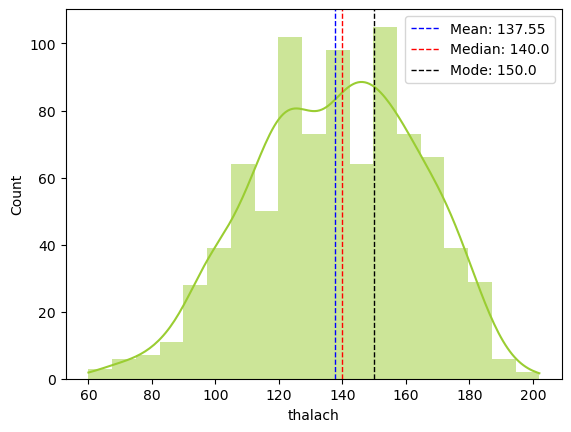

In [40]:
### Checking how data is distributed ###
# to decide the best method for imputation (mean or median)

# Plotting histogram plot
sns.histplot(dataset['thalach'], kde=True, color='yellowgreen')
# Removing color of the edges of histogram bars
plt.rcParams['patch.edgecolor'] = 'none'
# Plotting mean, median and mode
plt.axvline(dataset['thalach'].mean(), color='blue', linestyle='dashed', linewidth=1, label="Mean: " + str(round(dataset['thalach'].mean(), 2)))
plt.axvline(dataset['thalach'].median(), color='red', linestyle='dashed', linewidth=1, label="Median: " + str(round(dataset['thalach'].median(), 2)))
plt.axvline(dataset['thalach'].mode()[0], color='black', linestyle='dashed', linewidth=1, label="Mode: " + str(round(dataset['thalach'].mode()[0], 2)))
# Displaying legend
plt.legend(loc='upper right')

In [41]:
# Calculate the skewness 
print(skew(dataset['thalach'], nan_policy='omit'))

-0.21075230265417322


The distribution of the variable is approximately normal (symmetrical). Hence Mean Imputation method will be suitable.

##### Mean Imputation

In [42]:
### Replacing missing values with mean ###

# Thalach column contains 6.0% missing values, as shown in the visual above.
# Filling missing values with the mean value, as the column is continuous.

dataset['thalach'].fillna(value = dataset['thalach'].mean().round(1), inplace=True)
dataset["thalach"].astype(int)

0      150
1      108
2      129
3      187
4      172
      ... 
915    154
916    137
917    100
918    137
919     93
Name: thalach, Length: 920, dtype: int32

#### Exang Column

In [43]:
### Checking values in "exang" column ###

# Exercise induced angina
# 1 = yes, 0 = no

print(dataset["exang"].value_counts().index.tolist())

[0.0, 1.0]


##### Mode Imputation

In [44]:
### Replacing missing values with mode ###

# Exang column contains 6.0% missing values, as shown in the visual above
# Filling missing values with the mode value, as the column is binary
dataset['exang'].fillna(value = dataset['exang'].mode()[0], inplace=True)
dataset["exang"].astype(int)

0      0
1      1
2      1
3      0
4      0
      ..
915    0
916    0
917    0
918    0
919    1
Name: exang, Length: 920, dtype: int32

#### Oldpeak Column

In [45]:
### Checking values in "oldpeak" column ###

# ST depression induced by exercise relative to rest.
# 'ST' relates to positions on the ECG plot.

print(dataset["oldpeak"].value_counts().index.tolist())

[0.0, 1.0, 2.0, 1.5, 3.0, 0.5, 1.2, 2.5, 1.4, 0.8, 1.6, 0.2, 0.6, 1.8, 0.4, 0.1, 4.0, 2.6, 2.8, 1.3, 2.2, 0.7, 1.9, 0.3, 3.6, 2.4, 1.1, 0.9, 3.4, 1.7, -1.0, 4.2, 2.3, 2.1, -0.5, 3.2, 3.5, -0.8, -0.1, -0.9, -2.0, -0.7, -2.6, 6.2, -1.5, -1.1, 5.0, 4.4, 3.8, 2.9, 5.6, 3.1, 3.7]


##### Checking data distribution

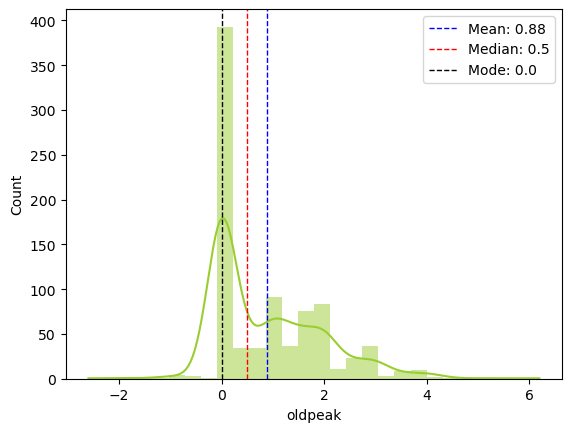

In [46]:
### Checking how data is distributed ###
# to decide the best method for imputation (mean or median)

# Plotting histogram plot
sns.histplot(dataset['oldpeak'], kde=True, color='yellowgreen')
# Removing color of the edges of histogram bars
plt.rcParams['patch.edgecolor'] = 'none'
# Plotting mean, median and mode
plt.axvline(dataset['oldpeak'].mean(), color='blue', linestyle='dashed', linewidth=1, label="Mean: " + str(round(dataset['oldpeak'].mean(), 2)))
plt.axvline(dataset['oldpeak'].median(), color='red', linestyle='dashed', linewidth=1, label="Median: " + str(round(dataset['oldpeak'].median(), 2)))
plt.axvline(dataset['oldpeak'].mode()[0], color='black', linestyle='dashed', linewidth=1, label="Mode: " + str(round(dataset['oldpeak'].mode()[0], 2)))
# Displaying legend
plt.legend(loc='upper right')

In [47]:
# Calculate the skewness 
print(skew(dataset['oldpeak'], nan_policy='omit'))

1.0396050538456334


The data in this column is highly positively skewed distribution. Hence Median Imputation method will be suitable

##### Median Imputation

In [48]:
### Replacing missing values with median ###

# Oldpeak column contains 6.7% missing values, as shown in the visual above
# Filling missing values with the median value, as the column is continuous

dataset['oldpeak'].fillna(value = round(dataset['oldpeak'].median(), 1), inplace=True)
dataset["oldpeak"].astype(int)

0      2
1      1
2      2
3      3
4      1
      ..
915    0
916    0
917    0
918    0
919    0
Name: oldpeak, Length: 920, dtype: int32

#### Slope Column

In [49]:
### Checking values in "slope" column ###

# The slope of the peak exercise ST segment.
# 1: upsloping, 2: flat, 3: downsloping.

print(dataset["slope"].value_counts().index.tolist())

[2.0, 1.0, 3.0]


##### Mode Imputation

In [50]:
### Replacing missing values with mode ###

# Slope column contains 33.6% missing values, as shown in the visual above.
# Filling missing values with the mode value, as the column is categorical.

dataset['slope'].fillna(value = dataset['slope'].mode()[0], inplace=True)
dataset["slope"].astype(int)

0      3
1      2
2      2
3      3
4      1
      ..
915    2
916    2
917    2
918    2
919    2
Name: slope, Length: 920, dtype: int32

#### CA Column

In [51]:
### Checking values in "CA" column ###

# The number of major vessels (0-3).

print(dataset["ca"].value_counts().index.tolist())

[0.0, 1.0, 2.0, 3.0]


In [52]:
### Deleting CA column ###

# CA column contains 66.4% missing values, as shown in the visual above.
# As the missing values are more than 65%, it is better to delete the column [1].
# [1] Beginner’s Guide to Missing Value Ratio and its Implementation, analyticsvidhya.com. [Online]. Available: https://www.analyticsvidhya.com/blog/2021/04/beginners-guide-to-missing-value-ratio-and-its-implementation/.

dataset.drop("ca", axis=1, inplace=True)
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,goal
0,63,1,1,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,6.0,0
1,67,1,4,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,2
2,67,1,4,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,7.0,1
3,37,1,3,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,3.0,0
4,41,0,2,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,3.0,0


In [53]:
# Now 13 columns are there for further pre-processing

#### Thal Column

In [54]:
### Checking values in "thal" column ###

# A blood disorder called thalassemia.
# 3 = normal, 6 = fixed defect, 7 = reversable defect.

print(dataset["thal"].value_counts().index.tolist())

[3.0, 7.0, 6.0]


##### Mode Imputation

In [55]:
### Replacing missing values with mode ###

# Thal column contains 52.8% missing values, as shown in the visual above.
# Filling missing values with the mode value, as the column is categorical.

dataset['thal'].fillna(value = dataset['thal'].mode()[0], inplace=True)
dataset["thal"].astype(int)

0      6
1      3
2      7
3      3
4      3
      ..
915    3
916    3
917    6
918    3
919    3
Name: thal, Length: 920, dtype: int32

#### Goal  Column (Target)

In [56]:
### Checking values in "goal" column (target variable) ###

# Target variable - diagnosis of heart disease (angiographic disease status).
# 0 = no presence of heart disease, [1, 2, 3, 4] = different levels of heart disease presence.

print(dataset["goal"].value_counts().index.tolist())

[0, 1, 2, 3, 4]


In [57]:
### Returning a tuple representing the dimensionality of the Dataset ###

dataset.shape

(920, 13)

In [58]:
# Returning the column labels of the DataFrame

dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'thal', 'goal'],
      dtype='object')

In [59]:
### Checking if all the columns are now clean ###

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    int64  
 2   cp        920 non-null    int64  
 3   trestbps  920 non-null    float64
 4   chol      920 non-null    float64
 5   fbs       920 non-null    float64
 6   restecg   920 non-null    float64
 7   thalach   920 non-null    float64
 8   exang     920 non-null    float64
 9   oldpeak   920 non-null    float64
 10  slope     920 non-null    float64
 11  thal      920 non-null    float64
 12  goal      920 non-null    int64  
dtypes: float64(9), int64(4)
memory usage: 93.6 KB


In [60]:
### Checking percentage of missing values ###

plot_null(dataset)

No NAs found


In [61]:
# No missing value is now there

### c) Replacing column values

#### Thal column

In [62]:
### Converting the datatype of Thal column

dataset["thal"].astype(int)

0      6
1      3
2      7
3      3
4      3
      ..
915    3
916    3
917    6
918    3
919    3
Name: thal, Length: 920, dtype: int32

In [63]:
### Checking values in Thal column ###

dataset['thal'].head()

0    6.0
1    3.0
2    7.0
3    3.0
4    3.0
Name: thal, dtype: float64

In [64]:
# Thal column values need replacing, as they are hard to interpret
# Current values: 3 = normal, 6 = fixed defect, 7 = reversable defect.
# New values: 1= normal, 2= fixed defect, 3= reversable defect

dataset['thal'].replace([3, 6, 7],[1, 2, 3], inplace=True)

In [65]:
### Checking values in Thal column ###

dataset['thal'].head()

0    2.0
1    1.0
2    3.0
3    1.0
4    1.0
Name: thal, dtype: float64

#### Goal column (target)

In [66]:
### Checking values in 'goal' column ###

dataset[["goal"]].value_counts()

goal
0       411
1       265
2       109
3       107
4        28
dtype: int64

In [67]:
# Current values: 0 = absence of heart disease, [1,2,3,4] = different levels of heart disease presence.
# Currently the goal column is a multi-class classification.
# Goal column values needs replacing.
# 1-4 values (different levels of heart disease) are not required to answer my research questions.
# For my research questions, the goal column needs to be converted to a binary classification.
# New values: 0 = absence of heart disease, 1= presence of heart disease

In [68]:
dataset['goal'].replace([2, 3, 4],[1, 1, 1], inplace=True)

In [69]:
### Checking values in 'goal' column ###

dataset["goal"].value_counts()

1    509
0    411
Name: goal, dtype: int64

Text(0.5, 1.0, 'Count of Heart Disease Classes')

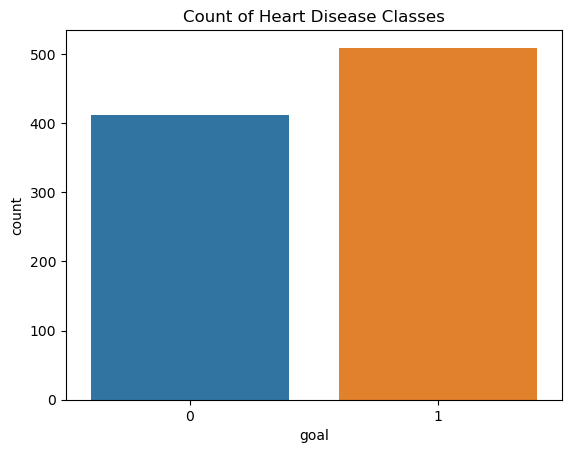

In [70]:
### Displaying number/count of patients/records in each class ###

sns.countplot(data= dataset, x='goal')
plt.title('Count of Heart Disease Classes')

In [71]:
### Checking how many classes we now have ###

len(dataset['goal'].value_counts().index)

2

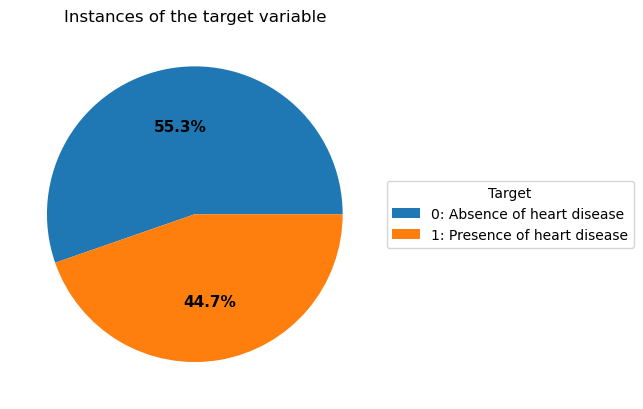

In [72]:
### Displaying percentage of patients/records in each class ###

# Create a figure and a set of subplots
fig, ax = plt.subplots()

### Create a pie chart ###
wedges, texts, autotexts = ax.pie(dataset['goal'].value_counts().values, autopct = '%1.1f%%')

### Stating labels ###
label = ["0: Absence of heart disease", "1: Presence of heart disease"]

### Giving the above stated labels to our pie chart ###
ax.legend(wedges, label,
          title="Target",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

### Setting the text properties of pie chart ###
plt.setp(autotexts, size=11, weight="bold")

### Settinng title of the plot ###
ax.set_title("Instances of the target variable")

### Showing plot ###
plt.show()

In [73]:
# The goal column is now a binary column.
# Number of instances that belong to class 0 are 410 and 1 are 508 (balanced binary classification).

### d) Renaming column names

In [74]:
# As the column names are ambiguous, renaming columns is a good practice here

In [75]:
# Renaming all columns in a single line using a dictionary inside the "rename" function
dataset.rename(columns={'cp': 'chest_pain_type', 'trestbps': 'resting_bp', 'chol': 'cholesterol', 'fbs': 'fasting_blood_sugar', 'thalach': 'max_heart_rate', 'exang': 'ex_induced_angina', 'oldpeak': 'st_depression', 'thal': 'thalassemia'}, inplace=True)

In [76]:
### Displaying data ###

dataset.head()

,age,sex,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,restecg,max_heart_rate,ex_induced_angina,st_depression,slope,thalassemia,goal
0,63,1,1,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,2.0,0
1,67,1,4,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,1.0,1
2,67,1,4,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,3.0,1
3,37,1,3,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,1.0,0
4,41,0,2,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,1.0,0


### e) Checking Outliers

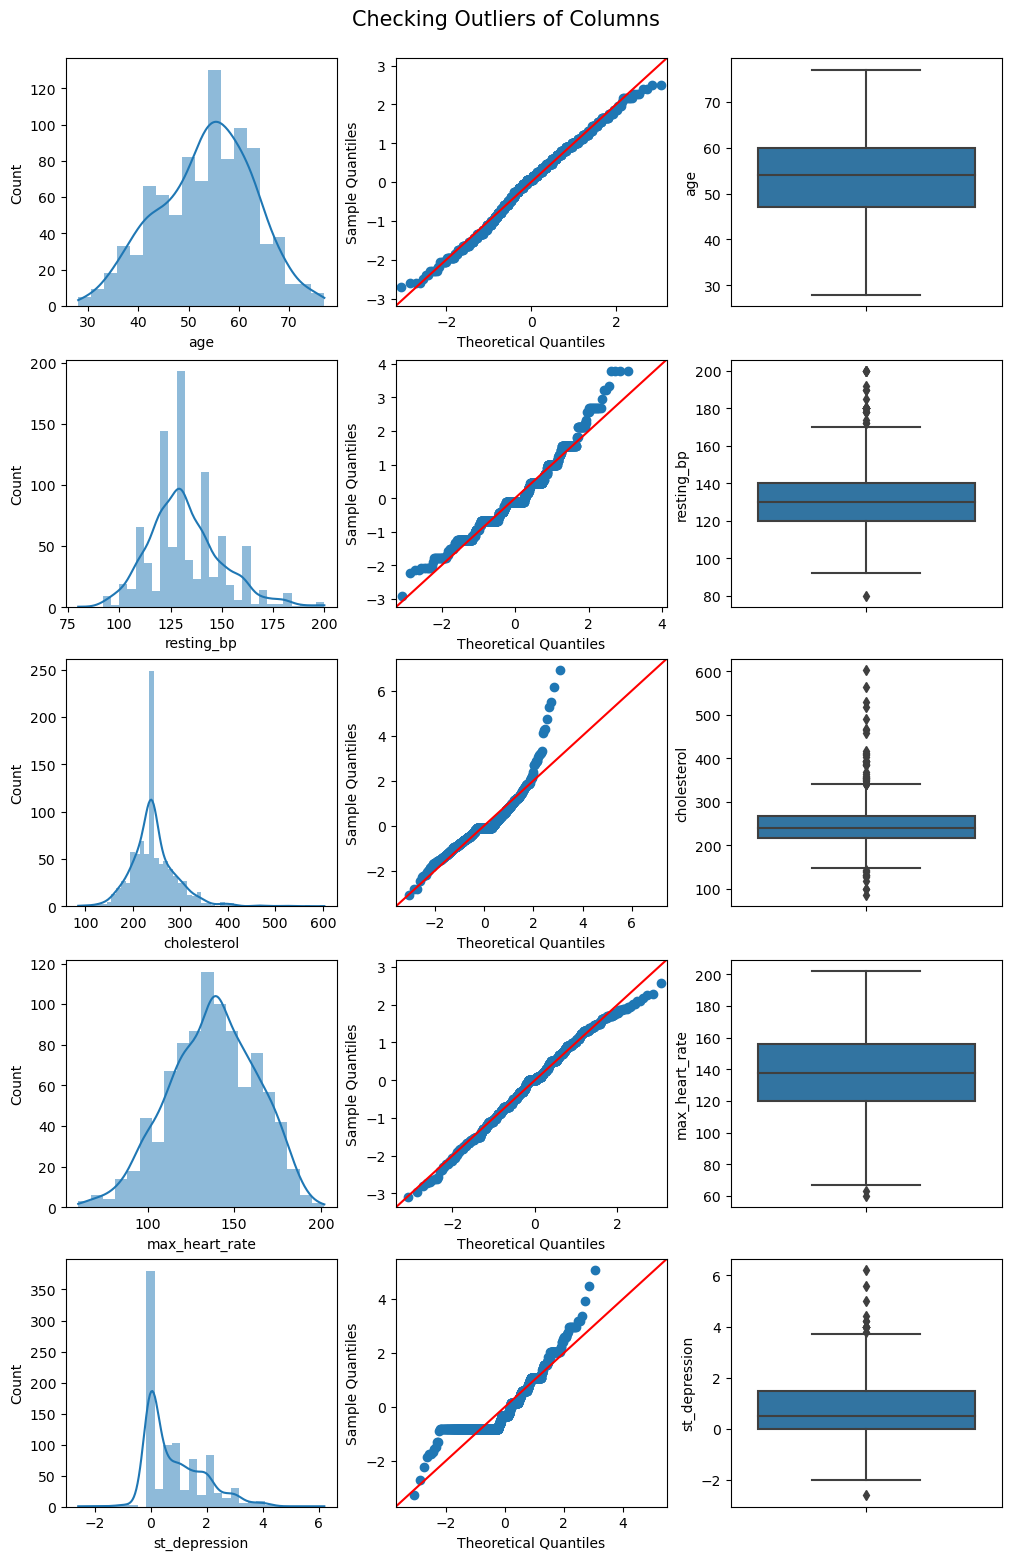

In [77]:
# Creating Function:
### Checking outliers using histogram, quantile-quantile and box plots for all numerical columns ###

def checking_outliers(df: pd.DataFrame):
    
    # Initialise the subplot function using number of rows and columns 
    figure, axes = plt.subplots(nrows= 5, ncols=3, figsize = (10, 15), constrained_layout = True)
    figure.suptitle('Checking Outliers of Columns', size=15, y=1.03)
    
    ### Age column ###
    # Checking how the data is distributed:
    sns.histplot(df['age'], kde=True, ax=axes[0, 0])
    # Verifying the distribution using a quantile-quantile plot:
    qqplot(df['age'], fit=True, line="45", ax=axes[0, 1])
    # Box plot to detect outliers
    sns.boxplot(y = 'age', data = df, ax=axes[0, 2])
    
    ### resting_bp column ###
    # Checking how the data is distributed:
    sns.histplot(df['resting_bp'], kde=True, ax=axes[1, 0])
    # Verifying the distribution using a quantile-quantile plot:
    qqplot(df["resting_bp"], fit=True, line="45", ax=axes[1, 1])
    # Box plot to detect outliers
    sns.boxplot(y = 'resting_bp', data = df, ax=axes[1, 2])
    
    ### cholesterol column ###
    # Checking how the data is distributed:
    sns.histplot(df['cholesterol'], kde=True, ax=axes[2, 0])
    # Verifying the distribution using a quantile-quantile plot:
    qqplot(df["cholesterol"], fit=True, line="45", ax=axes[2, 1])
    # Box plot to detect outliers
    sns.boxplot(y = 'cholesterol', data = df, ax=axes[2, 2])
    
    ### max_heart_rate column ###
    # Checking how the data is distributed:
    sns.histplot(df['max_heart_rate'], kde=True, ax=axes[3, 0])
    # Verifying the distribution using a quantile-quantile plot:
    qqplot(df["max_heart_rate"], fit=True, line="45", ax=axes[3, 1])
    # Box plot to detect outliers
    sns.boxplot(y = 'max_heart_rate', data = df, ax=axes[3, 2])
    
    ### st_depression column ###
    # Checking how the data is distributed:
    sns.histplot(df['st_depression'], kde=True, ax=axes[4, 0])
    # Verifying the distribution using a quantile-quantile plot:
    qqplot(df["st_depression"], fit=True, line="45", ax=axes[4, 1])
    # Box plot to detect outliers
    sns.boxplot(y = 'st_depression', data = df, ax=axes[4, 2])
    
    
    plt.show()
    
checking_outliers(dataset)

#### age column

In [78]:
# A normal distribution it is and no outliers found.

#### resting_bp column

In [79]:
# Outliers have been detected.
# Positively skewed distribution it is, hence will use IQR to remove outliers.

##### IQR

In [80]:
### Finding the IQR ###

q1 = dataset['resting_bp'].quantile(0.25)
q3 = dataset['resting_bp'].quantile(0.75)

iqr = q3 - q1

In [81]:
### Finding the upper and lower limits ###

upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

In [82]:
### Finding outliers ###

dataset[dataset['resting_bp'] > upper_limit]
dataset[dataset['resting_bp'] < lower_limit]

,age,sex,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,restecg,max_heart_rate,ex_induced_angina,st_depression,slope,thalassemia,goal
644,53,1,4,80.0,239.5,0.0,0.0,141.0,1.0,2.0,3.0,1.0,0


In [83]:
### Trimming outliers ###

dataset = dataset[dataset['resting_bp'] < upper_limit]
dataset.shape

(880, 13)

In [84]:
### Checking the statistics using the “Describe” function ###

dataset['resting_bp'].describe()

count    880.000000
mean     130.019318
std       15.129049
min       80.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      165.000000
Name: resting_bp, dtype: float64

#### cholesterol column

In [85]:
# Outliers have been detected.
# The distribution is highly positively skewed distribution,
# hence will use IQR to remove outliers

##### IQR

In [86]:
### Finding the IQR ###

q1 = dataset['cholesterol'].quantile(0.25)
q3 = dataset['cholesterol'].quantile(0.75)

iqr = q3 - q1

In [87]:
### Finding the upper and lower limits ###

upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

In [88]:
### Finding outliers ###

dataset[dataset['cholesterol'] > upper_limit]
dataset[dataset['cholesterol'] < lower_limit]

,age,sex,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,restecg,max_heart_rate,ex_induced_angina,st_depression,slope,thalassemia,goal
93,44,0,3,108.0,141.0,0.0,0.0,175.0,0.0,0.6,2.0,1.0,0
202,57,1,3,150.0,126.0,1.0,0.0,173.0,0.0,0.2,1.0,3.0,0
300,57,1,4,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,3.0,1
303,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,2.0,1.0,0
417,50,1,4,140.0,129.0,0.0,0.0,135.0,0.0,0.0,2.0,1.0,0
431,52,1,2,140.0,100.0,0.0,0.0,138.0,1.0,0.0,2.0,1.0,0
473,56,1,4,120.0,85.0,0.0,0.0,140.0,0.0,0.0,2.0,1.0,0
499,38,1,4,92.0,117.0,0.0,0.0,134.0,1.0,2.5,2.0,1.0,1
748,56,1,4,120.0,100.0,0.0,0.0,120.0,1.0,1.5,2.0,3.0,1
832,49,1,3,130.0,142.0,0.0,0.0,137.5,0.0,0.5,2.0,1.0,1


In [89]:
### Trimming outliers ###

dataset = dataset[dataset['cholesterol'] < upper_limit]
dataset.shape

(842, 13)

#### max_heart_rate column

In [90]:
# Outliers have been detected
# The distribution is approximately normal (symmetrical), hence will use z-score to remove outliers.

##### Z-score

In [91]:
### Applying Z-score to remove outliers ###

# Finding the boundary values
print('Highest allowed', dataset['max_heart_rate'].mean() + 3*dataset['max_heart_rate'].std())
print('Lowest allowed', dataset['max_heart_rate'].mean() - 3*dataset['max_heart_rate'].std())

Highest allowed 213.00324169709407
Lowest allowed 62.471817685328716


In [92]:
### Finding the outliers ###

dataset[(dataset['max_heart_rate'] > 213) | (dataset['max_heart_rate'] < 62)]

,age,sex,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,restecg,max_heart_rate,ex_induced_angina,st_depression,slope,thalassemia,goal
631,51,1,4,140.0,239.5,0.0,0.0,60.0,0.0,0.0,2.0,1.0,1


In [93]:
### Trimming outliers ###

new_df = dataset[(dataset['max_heart_rate'] < 213) & (dataset['max_heart_rate'] > 62)]
new_df

,age,sex,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,restecg,max_heart_rate,ex_induced_angina,st_depression,slope,thalassemia,goal
0,63,1,1,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,2.0,0
1,67,1,4,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,1.0,1
2,67,1,4,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,3.0,1
3,37,1,3,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,1.0,0
4,41,0,2,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,46,1,4,134.0,310.0,0.0,0.0,126.0,0.0,0.0,2.0,1.0,1
915,54,0,4,127.0,333.0,1.0,1.0,154.0,0.0,0.0,2.0,1.0,1
916,62,1,1,130.0,139.0,0.0,1.0,137.5,0.0,0.5,2.0,1.0,0
917,55,1,4,122.0,223.0,1.0,1.0,100.0,0.0,0.0,2.0,2.0,1


In [94]:
### Capping on outliers ###

upper_limit = dataset['max_heart_rate'].mean() + 3*dataset['max_heart_rate'].std()
lower_limit = dataset['max_heart_rate'].mean() - 3*dataset['max_heart_rate'].std()

In [95]:
### Applying the capping ###

dataset['max_heart_rate'] = np.where(dataset['max_heart_rate']>upper_limit,
                      upper_limit,
                      np.where(dataset['max_heart_rate']<lower_limit,
                               lower_limit,
                               dataset['max_heart_rate']))

In [96]:
### Returning dimensionality of the Dataset ###

dataset.shape

(842, 13)

In [97]:
### Checking the statistics using the “Describe” function ###

dataset['max_heart_rate'].describe()

count    842.000000
mean     137.740465
std       25.079607
min       62.471818
25%      120.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: max_heart_rate, dtype: float64

#### st_depression column

In [98]:
# Outliers have been detected.
# The distribution is highly positively skewed distribution,
# hence will use IQR to remove outliers

##### IQR

In [99]:
### Finding the IQR ###

q1 = dataset['st_depression'].quantile(0.25)
q3 = dataset['st_depression'].quantile(0.75)

iqr = q3 - q1

In [100]:
### Finding the upper and lower limits ###

upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

In [101]:
### Finding outliers ###

dataset[dataset['st_depression'] > upper_limit]
dataset[dataset['st_depression'] < lower_limit]

,age,sex,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,restecg,max_heart_rate,ex_induced_angina,st_depression,slope,thalassemia,goal
615,46,1,4,100.0,239.5,0.0,1.0,133.0,0.0,-2.6,2.0,1.0,1


In [102]:
### Trimming outliers ###

dataset = dataset[dataset['st_depression'] < upper_limit]
dataset.shape

(830, 13)

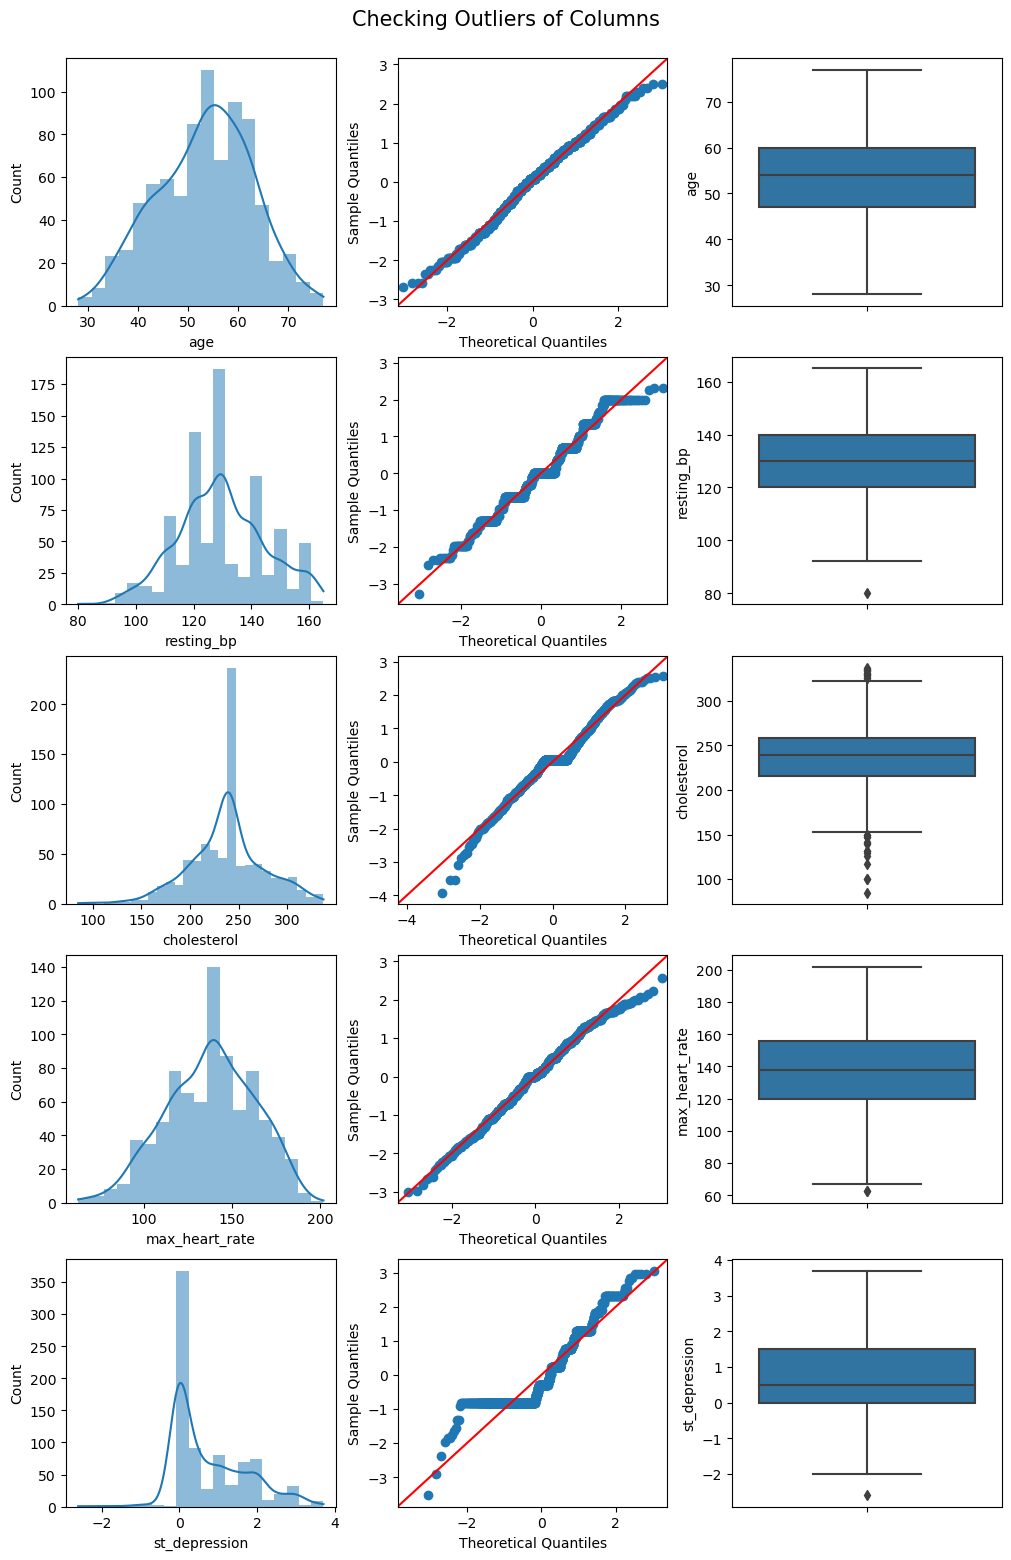

In [103]:
### Checking outliers of cleaned dataset ###

checking_outliers(dataset)

All extreme values are now removed

### f) Detect and Remove Duplicates

In [104]:
# Dropping duplicate rows
dataset.drop_duplicates(inplace = True)

# Resetting index after dropping duplicate rows
dataset.reset_index(drop = True, inplace = True)

# Returning dimensionality of the Dataset
dataset.shape

(828, 13)

In [105]:
# 2 duplicate records have been identified and removed

In [106]:
### Displaying the final cleaned dataset ###

dataset.head()

,age,sex,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,restecg,max_heart_rate,ex_induced_angina,st_depression,slope,thalassemia,goal
0,63,1,1,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,2.0,0
1,67,1,4,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,1.0,1
2,67,1,4,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,3.0,1
3,37,1,3,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,1.0,0
4,41,0,2,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,1.0,0


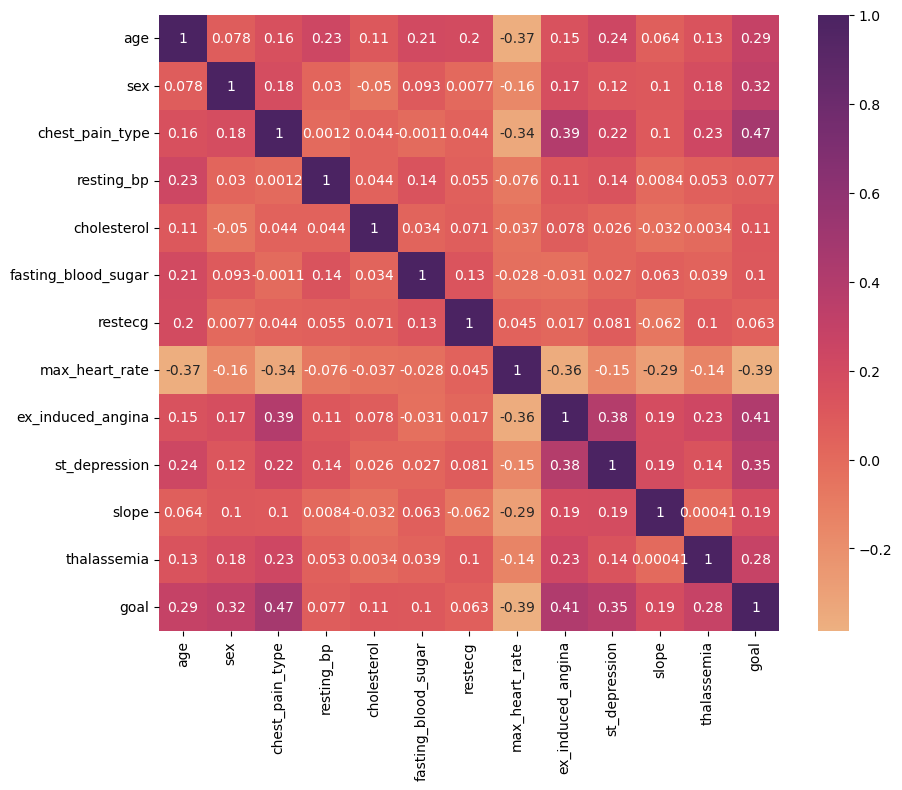

In [107]:
### Correlation Heat map of the final cleaned dataset ###

plot_corrheatmap(dataset)

### g) Saving the cleaned dataset into system

In [108]:
# To save the final cleaned dataset to your preferred location, please change the file location
# This dataset will be used in the next notebook: "heart_disease_classification.ipynb"

dataset.to_csv(r'cleaned_heart_disease_dataset.csv', index = False)